In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import kaggle
import seaborn as sns


In [2]:
dataset = 'pavansubhasht/ibm-hr-analytics-attrition-dataset'
destination = './data'

# kaggle.api.dataset_download_files(dataset, path=destination, unzip=True)

# Lire le dataset
data = pd.read_csv(f'{destination}/WA_Fn-UseC_-HR-Employee-Attrition.csv')

print(data.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Description des variables

Ce jeu de données contient des informations sur les employés d'une entreprise, 
avec des variables démographiques, liées à l'emploi et à la satisfaction au travail.


| Variable | Type | Exemple de valeurs | Description |
|---|---|---|---|
| **`Age`** | Numérique - Discrète | 41, 49, 37, 33, 27  | Âge de l'employé |
| **`Attrition`** | Catégorique | Oui, Non | Indique si l'employé a quitté l'entreprise |
| **`BusinessTravel`** | Catégorique |  Rarement, Fréquemment, Jamais | Fréquence des voyages d'affaires |
| **`DailyRate`** | Numérique - Discrète | 1102, 279, 1373, 1392, 591 | Taux journalier de l'employé (salaire ou allocation) |
| **`Department`** | Catégorique | Ventes, Recherche & Développement | Département de l'employé |
| **`DistanceFromHome`** | Numérique - Discrète | 1, 8, 2, 3, 2 | Distance entre le domicile et le lieu de travail |
| **`Education`** | Catégorique | 1, 2, 3, 4, 5 | Niveau d'éducation (1: Lycée, 2: Licence, etc.) |
| **`EducationField`** | Catégorique | Sciences de la vie, Médecine, Marketing | Domaine d'études |
| **`EmployeeCount`** | Numérique - Discrète | 1 | Nombre d'employés (probablement redondant ou erroné) |
| **`EmployeeNumber`** | Numérique - Discrète | 1, 2, 4, 5, 7 | Identifiant unique de l'employé |
| **`EnvironmentSatisfaction`** | Catégorique | 1, 2, 3, 4 | Niveau de satisfaction vis-à-vis de l'environnement de travail |
| **`Gender`** | Catégorique | Homme, Femme | Sexe de l'employé |
| **`HourlyRate`** | Numérique - Discrète | 94, 61, 92, 56, 40 | Taux horaire de l'employé |
| **`JobInvolvement`** | Catégorique | 3, 2, 2, 3, 3 | Niveau d'implication dans le travail |
| **`JobLevel`** | Catégorique | 2, 2, 1, 1, 1 | Niveau hiérarchique du poste |
| **`JobRole`** | Catégorique | Sales Executive, Research Scientist, Laboratory Technician | Poste occupé par l'employé |
| **`JobSatisfaction`** | Catégorique | 4, 2, 3, 3, 2 | Niveau de satisfaction vis-à-vis du travail |
| **`MaritalStatus`** | Catégorique | Célibataire, Marié, Divorcé | Statut matrimonial |
| **`MonthlyIncome`** | Numérique - Discrète | 5993, 5130, 2090, 2909, 3468 | Revenu mensuel de l'employé |
| **`MonthlyRate`** | Numérique - Discrète | 19479, 24907, 2396, 23159, 16632 | Taux mensuel de l'employé (probablement lié au salaire) |
| **`NumCompaniesWorked`** | Numérique - Discrète | 8, 1, 6, 1, 9 | Nombre d'entreprises pour lesquelles l'employé a travaillé |
| **`Over18`** | Catégorique | Oui | Indique si l'employé a plus de 18 ans (probablement toujours "Oui") |
| **`OverTime`** | Catégorique | Oui, Non | Indique si l'employé fait des heures supplémentaires |
| **`PercentSalaryHike`** | Numérique - Discrète | 11, 23, 15, 11, 12 | Pourcentage d'augmentation de salaire |
| **`PerformanceRating`** | Catégorique | 3, 4, 3, 3, 3 | Evaluation de la performance de l'employé |
| **`RelationshipSatisfaction`** | Catégorique | 1, 4, 2, 3, 4 | Niveau de satisfaction concernant les relations au travail |
| **`StandardHours`** | Numérique - Discrète | 80 | Nombre d'heures de travail standard par jour |
| **`StockOptionLevel`** | Catégorique | 0, 1, 0, 0, 1 | Niveau d'options d'achat d'actions |
| **`TotalWorkingYears`** | Numérique - Discrète | 8, 10, 7, 8, 6 | Nombre total d'années d'expérience professionnelle |
| **`TrainingTimesLastYear`** | Numérique - Discrète | 0, 3, 3, 3, 3 | Nombre de formations suivies l'année précédente |
| **`WorkLifeBalance`** | Catégorique | 1, 3, 3, 3, 3 | Équilibre entre vie professionnelle et vie privée |
| **`YearsAtCompany`** | Numérique - Discrète | 6, 10, 0, 8, 2 | Nombre d'années passées dans l'entreprise |
| **`YearsInCurrentRole`** | Numérique - Discrète | 4, 7, 0, 7, 2 | Nombre d'années dans le rôle actuel |
| **`YearsSinceLastPromotion`** | Numérique - Discrète | 0, 1, 0, 3, 2 | Nombre d'années depuis la dernière promotion |
| **`YearsWithCurrManager`** | Numérique - Discrète | 5, 7, 0, 0, 2 | Nombre d'années avec le manager actuel |

# Exploratory Data Analysis


In [4]:
print("Nombre de RelationshipSatisfaction unique:  ",data['RelationshipSatisfaction'].unique())
print("Nombre de Department unique: ",data['Department'].unique())
print("Nombre de StandardHours unique: ",data['StandardHours'].unique())
print("Nombre de TrainingTimesLastYear unique: ",data['TrainingTimesLastYear'].unique())

Nombre de RelationshipSatisfaction unique:   [1 4 2 3]
Nombre de Department unique:  ['Sales' 'Research & Development' 'Human Resources']
Nombre de StandardHours unique:  [80]
Nombre de TrainingTimesLastYear unique:  [0 3 2 5 1 4 6]


<Axes: xlabel='Attrition', ylabel='count'>

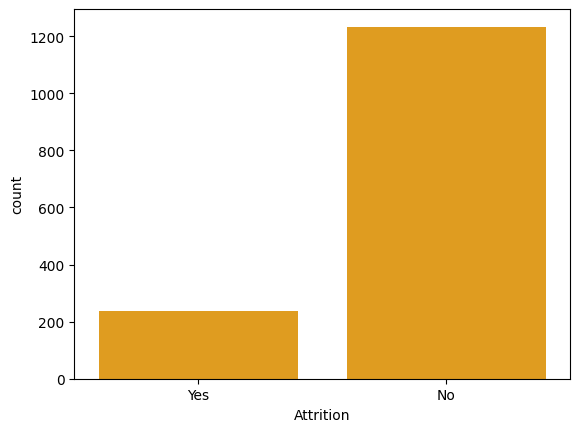

In [5]:
sns.countplot(x='Attrition', data=data,color="orange")

<Axes: xlabel='Gender', ylabel='count'>

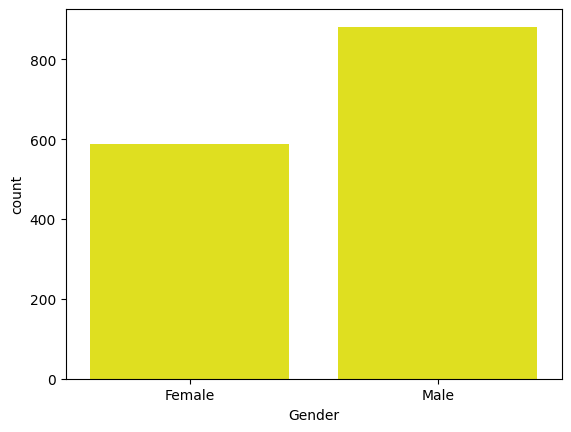

In [6]:
sns.countplot(x='Gender', data=data,color="yellow")

<Axes: xlabel='Age', ylabel='count'>

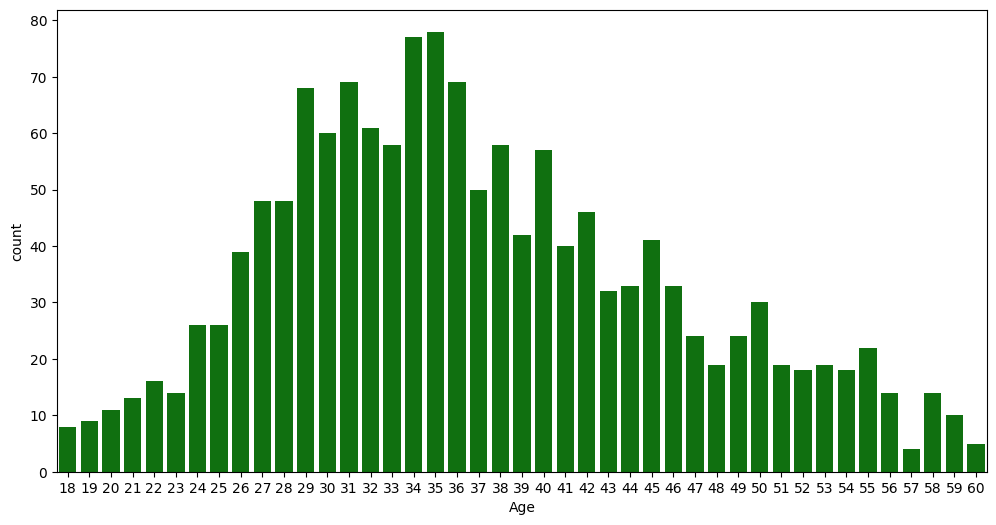

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age', data=data,color="green")

<Axes: xlabel='TotalWorkingYears', ylabel='count'>

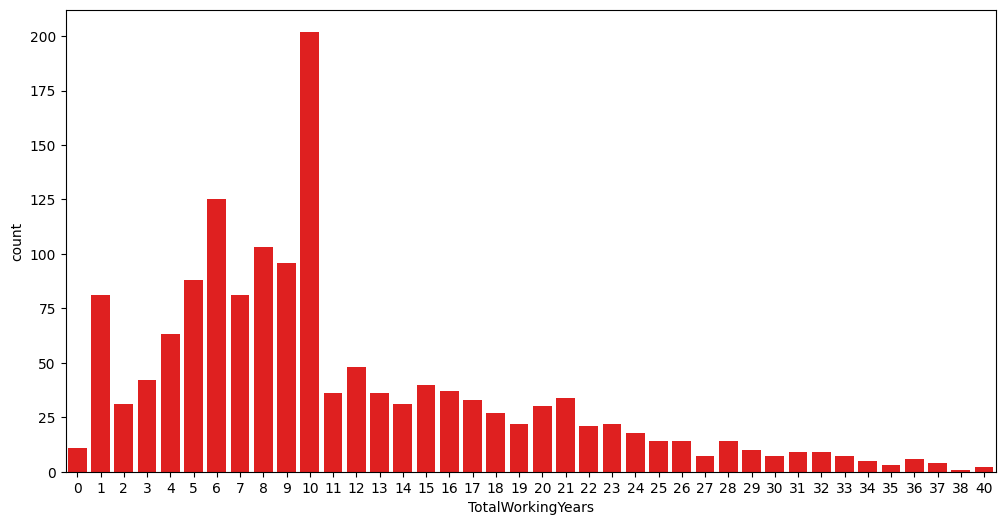

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x='TotalWorkingYears', data=data,color="red")

Text(0.5, 1.0, 'MonthlyIncome vs age')

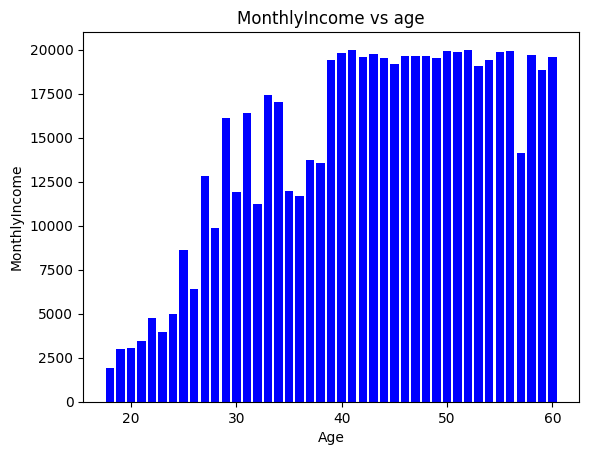

In [9]:
plt.bar(data['Age'], data['MonthlyIncome'], color="blue", width=0.8)
plt.xlabel("Age")
plt.ylabel("MonthlyIncome")
plt.title("MonthlyIncome vs age")

normalement logique car plus le nombre des annee augmente plus l'experince augmente plus income augmente

Text(0.5, 1.0, 'MonthlyIncome vs Department')

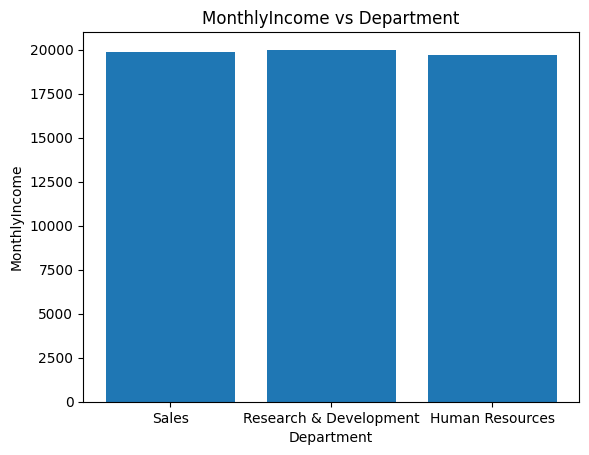

In [10]:
plt.bar(data['Department'], data['MonthlyIncome'], width=0.8)
plt.xlabel("Department")
plt.ylabel("MonthlyIncome")
plt.title("MonthlyIncome vs Department")

Alors nombre de salaire dans chaque departement est presque identique

In [11]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
# Créer un objet LabelEncoder
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

# Ajuster l'encodeur et transformer la colonne 'Attrition'
data['Attrition'] = le.fit_transform(data['Attrition']) 

In [13]:
data.Attrition

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

# Data Processing

In [14]:
data.shape

(1470, 35)

In [15]:
data.dtypes

Age                          int64
Attrition                    int32
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Nous avons effectuer l'entrainemenet a l'aide de decision tree alors dans la partie de encodage l'ordre n'est pas necessaire alors pour les donnees de type object on peux utiliser label encoder

In [16]:
label= LabelEncoder()
for column in data.columns:
    if data[column].dtype == "object":
        data[column] = label.fit_transform(data[column])

In [17]:
data.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [18]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [20]:
data.shape

(1470, 35)

In [21]:
from sklearn.model_selection import train_test_split

X = data.drop('Attrition', axis=1)
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(tree, X_train, y_train, X_test, y_test, train=True):
    """
    Affiche les métriques de performance d'un modèle de classification.

    Args:
        tree: Le modèle de classification.
        X: Les données d'entrée.
        y: Les étiquettes de classe.
        train:  True si on évalue sur les données d'entraînement, False sinon.
    """
    if train == True:
        y_train_pred = tree.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, y_train_pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classification_report(y_train, y_train_pred)}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, y_train_pred)}\n")
    else:
        y_test_pred = tree.predict(X_test)
        tree_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{tree_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_test_pred)}\n")

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.74%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1233
           1       0.80      0.82      0.81       237

    accuracy                           0.94      1470
   macro avg       0.88      0.89      0.89      1470
weighted avg       0.94      0.94      0.94      1470

_______________________________________________
Confusion Matrix: 
 [[1183   50]
 [  42  195]]

Test Result:
Accuracy Score: 79.14%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887097   0.275362  0.791383    0.581230      0.802480
recall       0.868421   0.311475  0.791383    0.589948      0.791383
f1-score     0.877660   0.292308  0.791383    0.584984      0.796693
support    380.000000  61.000000  0.791383  441.000000    441.000000
_________________

Alors si on fait la compariason entre accuresy de traing et teste on peux voire que nous avons tomber dans un overfithing, parmis les olution pour eviter overfithing c'est de utiliser GridSearch

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4, 5],
    "min_samples_leaf":list(range(1, 20)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf,
    params,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
    cv=5
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 5776 candidates, totalling 28880 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 19, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 85.24%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1233
           1       0.69      0.16      0.25       237

    accuracy                           0.85      1470
   macro avg       0.77      0.57      0.59      1470
weighted avg       0.83      0.85      0.81      1470

_______________________________________________
Confusion Matrix: 
 [[1216   17]
 [ 200   37]]

Test Result:
Accuracy Score: 86.62%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.867277   0.750000  0.866213    0.808638      0.851055
recall       0.997368   0.0491

c:\Users\Anass\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
